In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set style
sns.set_style("ticks")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Iris.csv', 'database.sqlite']


### Nossa meta será treinar o algoritmo KNN de forma que ele consigar distinguir as espécies de acordo com as características das mesmas.

In [3]:
# Importa o dataset 
data = pd.read_csv('../input/Iris.csv')

In [4]:
# Visualiza 10 linhas aleatorios do dataset
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
112,113,6.8,3.0,5.5,2.1,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
43,44,5.0,3.5,1.6,0.6,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
103,104,6.3,2.9,5.6,1.8,Iris-virginica
74,75,6.4,2.9,4.3,1.3,Iris-versicolor


### # Sepal Width vs. Sepal Length

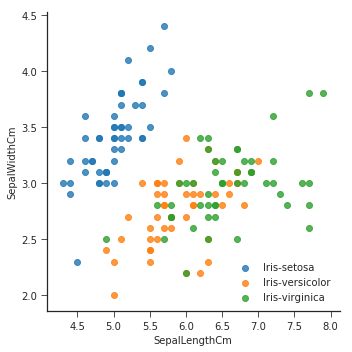

In [5]:
# SUbplot
#fig, ax =plt.subplots(1,2)

# Plota um scatterplot a partir da function lmplot do seaborn 
# O atributo fit_reg = false plota o gráfico sem a linha de regressão
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", data=data, fit_reg=False, legend=False,hue='Species')

# Posiciona a legenda para uma area vazia do gráfico 
plt.legend(loc='lower right')

### # Petal Width vs. Petal Length

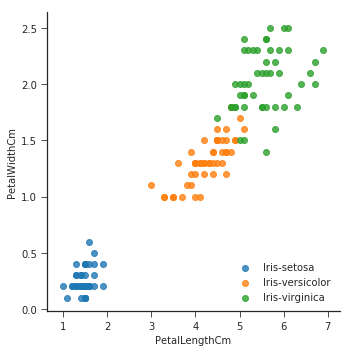

In [6]:
# Plota um scatterplot a partir da function lmplot do seaborn 
# O atributo fit_reg = false plota o gráfico sem a linha de regressão
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=data, fit_reg=False, legend=False,hue='Species')

# Posiciona a legenda para uma area vazia do gráfico 
plt.legend(loc='lower right')

In [7]:
from sklearn.cross_validation import train_test_split

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# Cria matrizes de dados para target e predictors  
X = np.array(data.drop(columns = ['Id','Species'])) 
y = np.array(data['Species']) 

In [9]:
# separa os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Fit KNN Model

In [18]:
# Carrega biblioteca
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instancia um modelo (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit Model
knn.fit(X_train, y_train)

# prevê a specie
pred = knn.predict(X_test)

# Avalia acuracia
accuracy_score(y_test,pred)


0.98

In [19]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

### SVC


In [20]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 

# prevê a specie
pred = clf.predict(X_test)

# Avalia acuracia
accuracy_score(y_test,pred)


1.0

In [21]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])